# 4. h√°zi feladat (HF4)

Bead√°si hat√°rid≈ë: 11.08. 23:59

Bek√ºld√©s: a Microsoft Teams fel√ºlet√©n kereszt√ºl

Adj sz√∂veges v√°laszt is, ahol a feladatkit≈±z√©s ezt k√©ri!

In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import matplotlib.pyplot as plt
import pandas as pd
import random
from sympy import *
init_printing(use_unicode=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

## 1. feladat (HF4/1) (5 pont)

Ebben a feladatban a logisztikus regresszi√≥ algoritmus√°t kell megval√≥s√≠tanod spam-sz≈±r√©s c√©lj√°b√≥l. A UCI adatt√°rh√°z [*Spambase* adatain](https://archive.ics.uci.edu/ml/datasets/Spambase) fogunk vizsg√°l√≥dni. Az adatokat a saj√°t g√©pedre val√≥ let√∂lt√©s n√©lk√ºl igyekezz bet√∂lteni!

**a)** (4 pont)<br>
Programozz le egy egyszer≈± logisztikus regresszi√≥s oszt√°lyoz√≥ algoritmust (teh√°t ne be√©p√≠tett algoritmust haszn√°lj)! <br>
A feladatot a m√°sodik h√°ziban meg√≠rt MykNN oszt√°lyhoz hasonl√≥an, objektum orient√°lt m√≥don kell megoldani. 
- Hozz l√©tre egy MyLogisticRegression oszt√°lyt.
- A konstruktor t√°rolja el a param√©tereket neki megfelel≈ë adattagokban. Adj meg nekik valamilyen kezdeti √©rt√©keket.
- A .fit(self, X_train, y_train) met√≥dus sz√°molja ki a logisztikus regresszi√≥ param√©tereit.
- A .predict(self, X_test) pedig adja vissza a predikci√≥kat. (0 vagy 1)
- A .predict_proba(self, X_test) pedig adja vissza a predikci√≥s scoreokat. (0 √©s 1 k√∂z√∂tti val√≥s sz√°m)

>Tipp: a Notebook04-ben sz√°mos hasznos seg√≠ts√©get tal√°lsz a line√°ris regresszi√≥ implement√°l√°s√°n√°l.

**b)** (1 pont)<br>
Haszn√°ld ugyanennek a probl√©m√°nak a megold√°s√°ra az *sklearn* k√∂nyvt√°r megfelel≈ë f√ºggv√©ny√©t is. Hogy viszonyul egym√°shoz az √°ltalad implement√°lt √©s a k√∂nyvt√°rban l√©v≈ë megold√°s pontoss√°g (accuracy) √©s fut√°sid≈ë tekintet√©ben? Adj √≠r√°sos v√°laszt is!<br> (Ne agg√≥dj, ha a te megold√°sod rosszabb lesz, nem c√©l az *sklearn* k√∂nyvt√°rban implement√°ltn√°l jobbat √≠rni.)

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

X = spambase.data.features
y = spambase.data.targets


In [ ]:
X.head()

In [ ]:
X.insert(0, "constant", [1 for i in range(4601)])

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad(w, X_train, y_train):
    out = np.array([0 for i in range(58)])
    for j in range(58):
        for i in range(4601):
            out[j] += y_train.iloc[i].iloc[0] * sigmoid(-np.dot(w, X_train.iloc[i])) * (-1) * X_train.iloc[i].iloc[j] + (1 - y_train.iloc[i].iloc[0]) * sigmoid(np.dot(w, X_train.iloc[i])) * X_train.iloc[i].iloc[j]
    return out

def sztochgrad(w, X_train, y_train):
    out = np.array([0 for i in range(58)])
    i = random.randint(0,shape(X_train)[0]-1 )
    for j in range(58):
        out[j] = -1 * y_train.iloc[i].iloc[0]  * sigmoid(-np.dot(w, X_train.iloc[i])) * X_train.iloc[i].iloc[j] ### y_i = 1 eset√©n, azaz ha 1 a c√©lv√°ltoz√≥ √©rt√©ke
        + (1 - y_train.iloc[i].iloc[0]) * sigmoid( np.dot(w, X_train.iloc[i])) * X_train.iloc[i].iloc[j] ### y_i = 0 eset√©n, azaz ha 0 a c√©lv√°ltoz√≥ √©rt√©ke
    return out




class MyLogisticRegression():
    def __init__(self, w = [random.random() for _ in range(58)]):
        self.w = w
        return None
    
    def fit(self, X_train, y_train, lrate):
        #X_train.insert(0, "constant", [1 for i in range(4601)])
        for _ in range(1000):
            self.w = self.w - lrate * sztochgrad(self.w, X_train, y_train)
            lrate = lrate * 0.1
    
    def predict(self, X_test):
        return np.array([ 0 if self.predict_proba(X_test)[i] < 0.5 else 1 for i in range(shape(X_test)[0])])
    
    def predict_proba(self, X_test):
        return np.array([sigmoid(np.dot(self.w, X_test.iloc[i])) for i in range(shape(X_test)[0])])



---

In [ ]:
#i = random.randint(0, 4600)
#i=4600
#print(i)
#print(sigmoid(np.dot(valami.w, X.iloc[i])))
#print(np.dot(valami.w, X.iloc[i]))
"""lista = []
lista2 = []
for i in range(4601):
    lista.append(np.dot(valami.w, X.iloc[i]))
    lista2.append(valami.predict(X.iloc[i]))
lista.sort()
print(lista)"""

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

valami = MyLogisticRegression()
valami.fit(X_train, y_train, 0.5)

pred = valami.predict(X_test)

print(pred)

In [ ]:
skmodel = sklearn.linear_model.LogisticRegression()
skmodel.fit(X_train, y_train)
skpred = skmodel.predict(X_test)

In [ ]:
print(f'Accuracy of MyLogisticRegression: {round(sklearn.metrics.accuracy_score(y_test, pred),2)}')
print(f'Accuracy of ScikitLearn: {round(sklearn.metrics.accuracy_score(y_test, skpred),2)}')


V√°lasz: Jelenleg sajnos nem l√°tszik, de lefut a programom, csak most t√°volr√≥l nem tudja bet√∂lteni az adatokat (szerverhiba miatt) :(

## 2. feladat (HF4/2) (6 pont)

Ebben a feladatban polinomi√°lis regresszi√≥val fogunk foglalkozni √©s a polinom fok√°nak az eredm√©nyre gyakorolt hat√°s√°t vizsg√°ljuk.

**a)** (1 pont)<br>
Konstru√°lj adatot ismert h√°tt√©reloszl√°sb√≥l, azaz hozz l√©tre mesters√©ges k√©tdimenzi√≥s adatot! Szimul√°lj legal√°bb 1000 adatpontot!
* Haszn√°ld a lent megadott adatgener√°l√≥ f√ºggv√©nyt a [-4,5] intervallumon! (M√≥dos√≠thatod a f√ºggv√©nyt √∫gy, hogy neked jobban tetsz≈ë adatokat hozzon l√©tre, a l√©nyeg, hogy a gener√°lt adat egy "zajos polinom" legyen egy √©rtelmes intervallumon!)
* Az adatok (v√©letlenszer≈±en v√°lasztott) 70%-√°t tekintsd tan√≠t√≥adatnak, a t√∂bbit tesztadatnak!
> Tipp: haszn√°ld a  *train_test_split* f√ºggv√©nyt!
* √Åbr√°zold az adatot pontfelh≈ëk√©nt! √Åbr√°zold k√ºl√∂n sz√≠nnel a tan√≠t√≥- √©s tesztadatokat.

In [2]:
import numpy as np

def curve_generator( x , sigma ):
    y = np.random.normal( x ** 4  -  x ** 3 - 20 * x ** 2 + 27 * x + 2 , sigma )
    return y

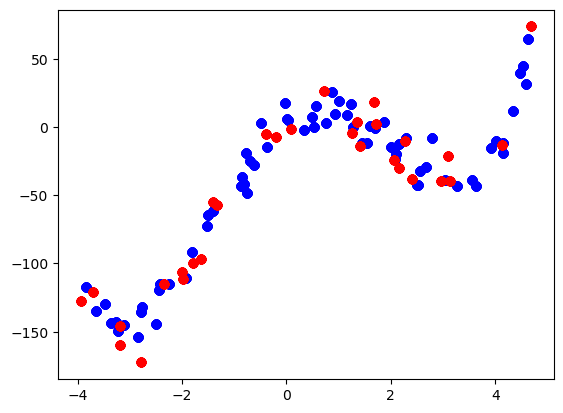

In [3]:
list = pd.Series([random.random()*9 -4 for i in range(100)])

train_x, test_x = train_test_split(list, test_size=0.3, random_state=5)
train_y = [curve_generator(i, 10) for i in train_x]
test_y = [curve_generator(i, 10) for i in test_x]
list_y = [train_y[i] for i in range(len(train_x))] + [test_y[i] for i in range(len(test_y))]

for i in range(len(train_x)):
    plt.scatter(train_x, train_y, c="blue", label="Training points")
for i in range(len(test_x)):
    plt.scatter(test_x, test_y, c="red", label="Tested points")

plt.show()

**b)** (3 pont)<br>
Tan√≠tsunk egyszer≈± polinomi√°lis regresszi√≥t az adatra (c√©lv√°ltoz√≥: $y$, magyar√°z√≥ v√°ltoz√≥: $x$).
> Tipp: haszn√°ld az *np.polyfit* f√ºggv√©nyt!

* √Åbr√°zold egy √°br√°n (k√ºl√∂n sz√≠nnel) a tan√≠t√≥halmazbeli √©s a teszthalmazbeli hib√°t (RMSE-√©rt√©ket) a regresszi√≥s polinom fok√°nak f√ºggv√©ny√©ben (v√°ltoztasd a polinom fok√°t 0 √©s 20 k√∂z√∂tt)!
* K√©sz√≠ts √°br√°kat 3x7-es r√°csban, amelyeken l√°tszik hogy az egyes polinomok hogyan simulnak az adatra! Az egyes r√©sz√°br√°k c√≠me mutassa melyik fok√∫ polinomr√≥l van sz√≥, az √°br√°k tengelyeit pedig rejtsd el!
> Tipp: haszn√°ld a *plt.subplots* f√ºggv√©nyt!

* Mit tapasztalsz?

In [4]:
def atlag(lista):
    s = 0
    for i in lista:
        s += i
    return s/len(lista)



def rmse(set_x, set_y, d):
    coeff = np.polyfit(train_x, train_y, deg=d)
    pred = np.poly1d(coeff)
    return atlag((pred(set_x)-set_y)**2)**0.5


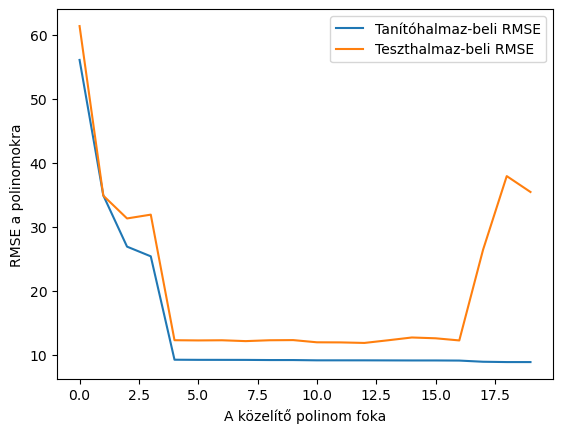

In [5]:
lista1 = []
lista2 = []
for d in range(20):
    lista1.append(rmse(train_x, train_y, d))
    lista2.append(rmse(test_x, test_y, d))


plt.plot(range(20), lista1)
plt.plot(range(20), lista2)
plt.legend(["Tan√≠t√≥halmaz-beli RMSE", "Teszthalmaz-beli RMSE"])
plt.xlabel('A k√∂zel√≠t≈ë polinom foka')
plt.ylabel('RMSE a polinomokra')


plt.show()

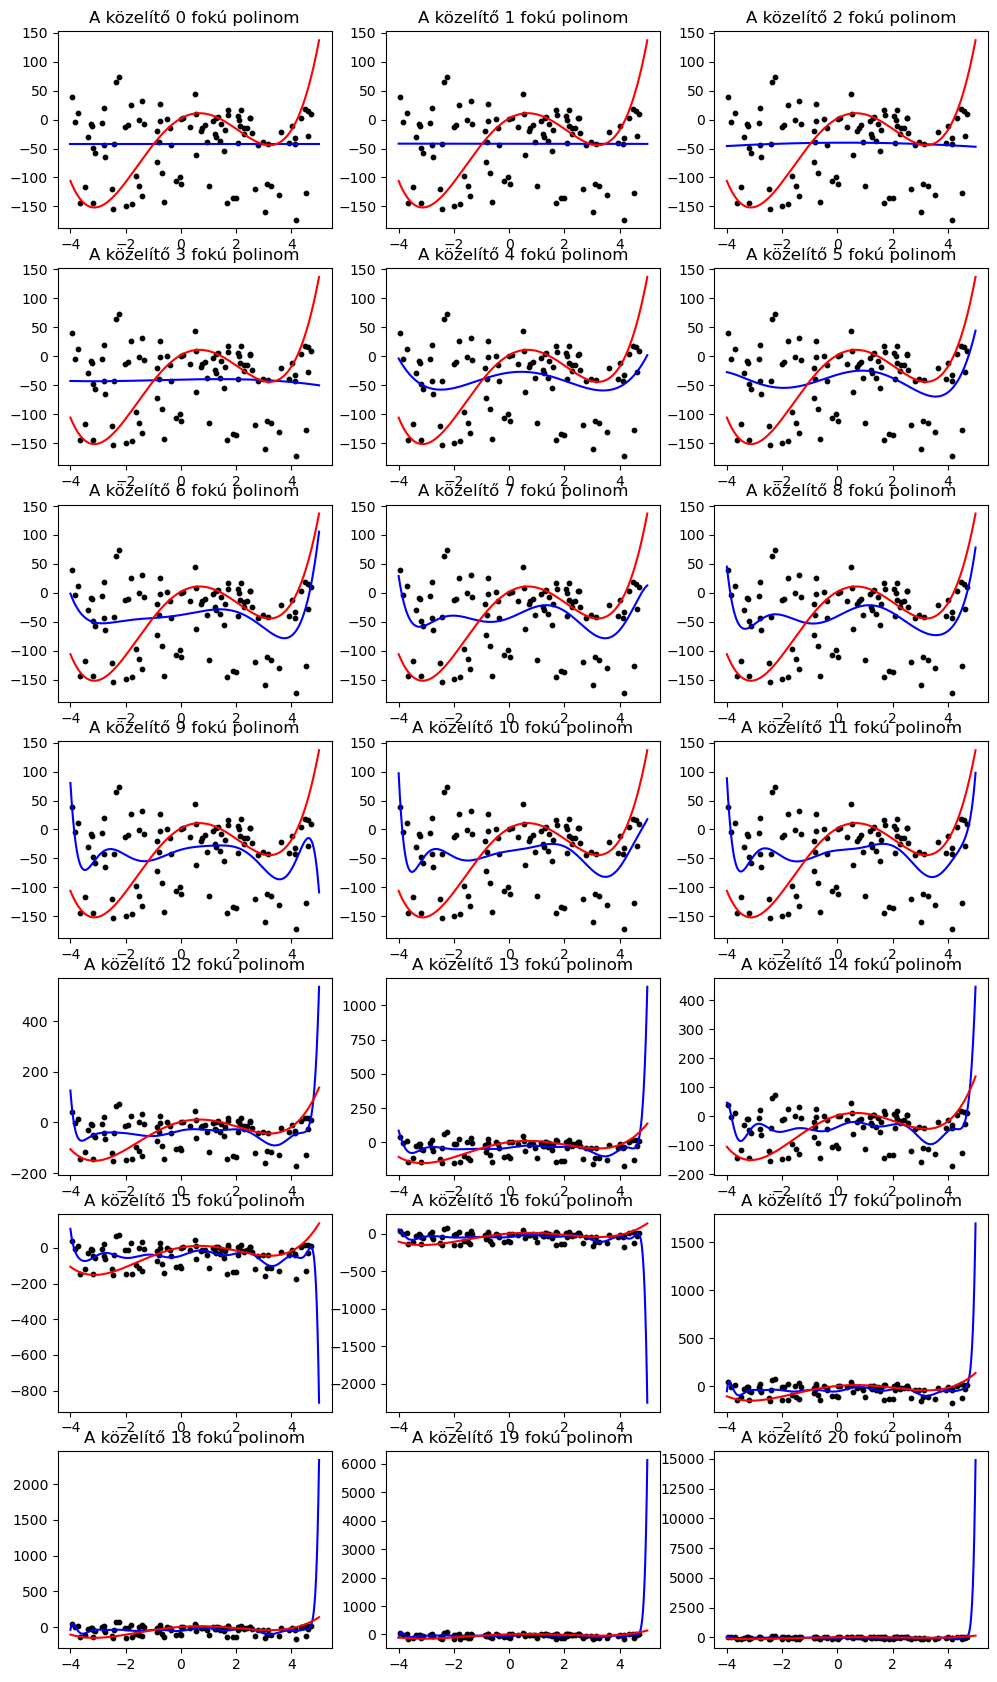

In [6]:
x = np.linspace(-4, 5, 1000)

fig, axs = plt.subplots(7, 3, figsize=(12,21))

for j in range(7):
    for i in range(3):
        ### itt i<->j csere ???
        f=np.poly1d(np.polyfit(list, list_y, i+3*j))
        y=f(x)
        axs[j, i].plot(x, y, c="blue")
        axs[j,i].scatter(list, list_y, c="black", s=10)
        axs[j,i].set_title(f'A k√∂zel√≠t≈ë {i+3*j} fok√∫ polinom')
        axs[j,i].plot(x, x ** 4  -  x ** 3 - 20 * x ** 2 + 27 * x + 2, c="red")

plt.show()


V√°lasz: F≈ëleg a polinom kirajzol√°sakor, de a n√©gyzetes hibaf√ºggv√©ny √°br√°j√°n is egy√©rtelm≈±en l√°tsz√≥dik hogy nagy fok√∫ polinommal ha becsl√ºnk, t√∫ltanul az algoritmusunk

**c)** (2 pont)<br>
Hogy v√°ltozik a modell teljes√≠tm√©nye, ha v√°ltoztatjuk a tan√≠t√≥halmaz m√©ret√©t? 
* A regresszi√≥s polinom fok√°nak r√∂gz√≠t√©se mellett v√°ltoztasd a tan√≠t√≥halmaz m√©ret√©t az eredeti tan√≠t√≥halmaz m√©ret√©nek megszor√≠t√°s√°val.
* A tan√≠t√≥halmaz m√©ret√©nek f√ºggv√©ny√©ben √°br√°zold egy √°br√°n a tan√≠t√≥halmazbeli √©s a teszthalmazbeli hib√°t (RMSE-√©rt√©ket).
* Jel√∂ld az √°br√°n a c√©lv√°ltoz√≥ gener√°l√°s√°nak v√©letlens√©g√©b≈ël ad√≥d√≥ bels≈ë (irreducibilis) hib√°t is, ez itt a *sigma* sz√≥r√°s √©rt√©k√©nek felel meg, vagyis konstans.
* V√©gezd el ezt az elemz√©st √∫gy, hogy a polinom fok√°t 1-re, 3-ra, 4-re, 8-ra, majd 20-ra √°ll√≠tod.  
* Mit tapasztalsz? √ârtelmezd az √°br√°kat!

---

## 3. feladat (HF4/3) (9 pont)

M√©g mindig borban az igazs√°g! üç∑ <br> Ebben a feladatban (a HF2/3 feladathoz hasonl√≥an) k√ºl√∂nb√∂z≈ë borok min≈ës√©g√©t kell predikt√°lnunk. Halad√≥ oszt√°lyoz√°si algoritmusok seg√≠ts√©g√©vel vizsg√°ljuk, hogy meg tudjuk-e j√≥solni puszt√°n a bor k√©miai tulajdons√°gai alapj√°n, hogy min≈ës√©gi bornak fogja-e tartani a szakma.

**a)** (1 pont)<br>
Ism√©teld meg a HF2/3/a feladatot: A [UCI adatt√°rh√°zban](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) tal√°lhat√≥ adatok alapj√°n fogunk vizsg√°l√≥dni. Ez t√∂bb ezer √©szak-portug√°liai bor 11 k√©miai tulajdons√°g√°t (pl. cukortartalom, pH, alkoholtartalom, stb.) √©s egy a borokra vonatkoz√≥ 10-es sk√°l√°n m√©rt min≈ës√©gi mutat√≥t tartalmaz.

* T√∂ltsd be a **v√∂r√∂s**borok adatait egy pandas dataframe-be [az adatt√°rh√°zb√≥l](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (Az adatot k√∂zvetlen√ºl az internetr≈ël, a f√°jl saj√°t g√©pre val√≥ let√∂lt√©se n√©lk√ºl t√∂ltsd be!)
* A *quality* oszlop lesz a c√©lv√°ltoz√≥, a t√∂bbi pedig a magyar√°z√≥v√°ltoz√≥ (feature). Bin√°ris oszt√°lyoz√°si feladatk√©nt tekint√ºnk a tov√°bbiakban a probl√©m√°ra, ez√©rt a c√©lv√°ltoz√≥ √©rt√©k√©t defini√°ld √°t: legyen az √©rt√©ke 0, ha *quality $<$ 7* (rossz borok), √©s legyen az √©rt√©ke 1, ha *quality $\geq$ 7* (j√≥ borok).
* Hozz l√©tre k√ºl√∂n numpy array-ket a c√©lv√°ltoz√≥ √©s az attrib√∫tumok t√°rol√°s√°ra!

In [7]:
wines = pd.read_csv('../Adatok/winequality-red.csv', sep=';' )

In [8]:
def csere(x):
    if x<6.5:
        return 0
    else:
        return 1

wines["quality"] = wines["quality"].apply(csere)
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0  
3      9.8        0  
4      9.4        0

In [9]:
X = np.array(wines[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])
y = np.array(wines["quality"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

**b)** (4 pont)<br>
V√©letlen erd≈ë
* Haszn√°lj v√©letlen erd≈ë algoritmust (20 f√°val) az oszt√°lyoz√°sra! 
* K√©rd le az egyes rekordokhoz tartoz√≥ val√≥sz√≠n≈±s√©gi pont√©rt√©keket! A bin√°ris d√∂nt√©st ez alapj√°n a pont√©rt√©k alapj√°n fogjuk meghozni, alapesetben 0.5 f√∂l√∂tt tekintj√ºk 1-es oszt√°lyba tartoz√≥nak, most viszont v√°ltoztatni fogjuk a k√ºsz√∂b√©rt√©ket.<br>
> Tipp: haszn√°ld a *predict_proba* f√ºggv√©nyt! 

* √çrj egy *predict_with_threshold* nev≈± f√ºggv√©nyt, aminek bemen≈ë param√©terei a betan√≠tott oszt√°lyoz√≥, az adatm√°trix, amire a j√≥sl√°st elv√©gezz√ºk √©s a k√ºsz√∂bindex (a k√ºsz√∂bindex az a pont√©rt√©k, ami felett 1-est d√∂nt√ºnk), eredm√©nye pedig a rekordokra vonatkoz√≥ bin√°ris d√∂nt√©s.

* T√≠zszeres keresztvalid√°ci√≥val √°llap√≠tsd meg, hogy milyen k√ºsz√∂b√©rt√©k eset√©n lesz optim√°lis az oszt√°lyoz√°s F-m√©rt√©ke! (Vizsg√°ld a k√ºsz√∂b√©rt√©ket a 0.1, 0.2, $\dots$ 0.9 halmazon!)<br>
> Tipp: haszn√°ld a *model_selection.cross_val_score* f√ºggv√©nyt *scoring=modified_f1(threshold)* be√°ll√≠t√°ssal, ahol a *threshold* v√©gigmegy a k√ºsz√∂b√©rt√©k lehets√©ges √©rt√©kein!

* √Åbr√°zold a *threshold* f√ºggv√©ny√©ben a keresztvalid√°ci√≥s technik√°val kij√∂v≈ë F-m√©rt√©kek boxplotj√°t! √ârtelmezd a kapott √°br√°t, milyen √©rt√©k eset√©n kapjuk a legjobb predikci√≥t? Magyar√°zd el, hogy mi√©rt kaphattuk ezt az eredm√©nyt annak t√ºkr√©ben, hogy kiegyens√∫lyozatlan oszt√°lyeloszl√°s√∫ oszt√°lyoz√°si feladaot oldottunk meg.<br>
> Tipp: haszn√°ld a *seaborn* csomag boxplot f√ºggv√©ny√©t!

Seg√≠ts√©gk√©ppen megadok egy *modified_f1* f√ºggv√©nyt, aminek bemenete egy k√ºsz√∂b√©rt√©k, eredm√©nye pedig egy olyan f√ºggv√©ny, ami megfelel≈ë arra, hogy a *cross_val_score* *scoring* argumentuma legyen. Ez a f√ºggv√©ny haszn√°lja az √°ltalad megfelel≈ëen defini√°lt *predict_with_threshold* nev≈± f√ºggv√©nyt!

In [10]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)

In [11]:
def predict_with_threshold(model, matrix, treshold):
    return [1 if model.predict_proba(matrix)[i][0] >= treshold else 0 for i in range(len(matrix))]

In [12]:
def modified_f1( threshold ):
    
    def f1_threshold( clf , X , y ):
        y_pred = predict_with_threshold( clf , X , threshold )
        return sklearn.metrics.f1_score( y , y_pred )
        
    return f1_threshold

In [ ]:
for threshold in range(1,10):
    scores = cross_val_score(model, X, y, cv=10, scoring=modified_f1(threshold))


√âs innent≈ël nincs elk√©sz√≠tve...

**c)** (1 pont)<br>
A v√©letlen erd≈ë seg√≠ts√©g√©vel az attrib√∫tumokhoz rendelhet√ºnk egy fontoss√°gi √©rt√©ket. 
* √Åbr√°zold a v√©letlen erd≈ë √°ltal adott, az egyes attrib√∫tumokhoz tartoz√≥ relat√≠v fontoss√°gi √©rt√©keket oszlopdiagramon.<br>
> Tipp: haszn√°ld a *feature\_importances\_* opci√≥t!

* Mi a k√©t legfontosabb v√°ltoz√≥?

**d)** (3 pont)<br>
Az oszt√°lyoz√≥k √°ltal adott d√∂nt√©si hat√°rt √©rdekes √°br√°zolni, hogy jobban meg√©rts√ºk az oszt√°lyoz√≥ d√∂nt√©s√©t, ugyanakkor ezt term√©szetesen csak kis dimenzi√≥ eset√©n tudjuk vizu√°lisan √©rtelmezni. √âppen ez√©rt a k√∂vetkez≈ëkben szor√≠tsd meg az attrib√∫tumteret az el≈ëz≈ë feladatr√©sz alapj√°n legfontosabbnak ad√≥d√≥ k√©t attrib√∫tumra! 
* Az al√°bbi oszt√°lyoz√≥k d√∂nt√©si hat√°r√°t ezut√°n √°br√°zold a lent megadott √°br√°zol√≥ f√ºggv√©ny seg√≠ts√©g√©vel: 
    * d√∂nt√©si fa az alap√©rtelmezett be√°ll√≠t√°sokkal
    * v√©letlen erd≈ë (15 d√∂nt√©si f√°val)
    * SVM (C = 100, gamma = 1.0 be√°ll√≠t√°sokkal)
    * SVM (C = 1.0, gamma = 1.0, class_weight=None be√°ll√≠t√°sokkal)
    * SVM (C = 1.0, gamma = 1.0, class_weight='balanced' be√°ll√≠t√°sokkal) (A 'balanced' be√°ll√≠t√°s az oszt√°ly gyakoris√°g√°val ford√≠tottan ar√°nyos m√≥don rendel s√∫lyt az egyes oszt√°lyba tartoz√≥ rekordokhoz.)
> Tipp: a szupport vektor g√©phez haszn√°ld az *sklearn.svm.SVC* f√ºggv√©nyt!

* Az *svm.SVC* milyen kernelt haszn√°l alap√©rtelmezetten? N√©zz ut√°na √©s √≠rd le, hogy ilyen esetben mi a C √©s a gamma szerepe?
* √ârtelmezd az √°br√°kat! Melyik esetben lehet t√∫ltanul√°sr√≥l besz√©lni, mi√©rt? Melyik d√∂nt√©si hat√°r a legkomplexebb?
* Mi a szerepe a d√∂nt√©si hat√°rt illet≈ëen a class_weight k√©t kipr√≥b√°lt be√°ll√≠t√°s√°nak? Melyik esetben lehet jobb a recall, a precision √©s az accurary √©rt√©k? Hogy lehetne jav√≠tani az SVM teljes√≠tm√©ny√©t?

A k√∂vetkez≈ëkben megadott d√∂nt√©si hat√°rt kirajzol√≥ f√ºggv√©nyt b√°tran m√≥dos√≠tsd, jav√≠tsd, hogy jobban √°tl√°that√≥ √°br√°kat kapj!

In [ ]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap( [ '#FFAAAA' , '#AAFFAA' , '#AAAAFF' ] )
cmap_bold = ListedColormap( [ '#FF0000' , '#00FF00' , '#0000FF' ] )

def points_plot( X , y , clf , colorscale = cmap_light , cdiscrete=cmap_bold ):
    
    if X.shape[ 1 ] != 2:
        raise ValueError( "X should have two features!" )
    
    Xtr , Xte , ytr , yte = train_test_split( X , y , train_size = 0.6 )
    clf = clf.fit( Xtr , ytr )
    h = 0.01
    x_min , x_max = X[ : , 0 ].min() - 0.5 , X[ : , 0 ].max() + 0.5
    y_min , y_max = X[ : , 1 ].min() - 0.5 , X[ : , 1 ].max() + 0.5
    xx , yy = np.meshgrid( np.linspace( x_min , x_max , 50 ) , np.linspace( y_min , y_max , 50 ) )
    
    plt.figure()
    Z = clf.predict( np.c_[ xx.ravel() , yy.ravel() ] )
    Z = Z.reshape( xx.shape )
    plt.pcolormesh( xx , yy , Z , cmap = cmap_light , alpha = 0.2 )
    # train points
    plt.scatter( Xtr[ : , 0 ] , Xtr[ : , 1 ] , c = ytr - 1 , cmap = cdiscrete , s = 50 , alpha = 0.2 , edgecolor = "k" )
    # test points
    plt.scatter( Xte[ : , 0 ] , Xte[ : , 1 ] , c = yte - 1 , cmap = cdiscrete , alpha = 0.5 , marker = "s" , s = 35 )
    plt.xlim( xx.min() , xx.max() )
    plt.ylim( yy.min() , yy.max() )
    # titles, labels
    plt.title( str( clf )[ 0 : str( clf ).find( "(" ) ] )
    plt.xlabel( "Feature 1" )
    plt.ylabel( "Feature 2" )

---